In [1]:
import pyathena as pa
import numpy as np
import matplotlib.pyplot as plt
from for_hii import hii
from pathlib import Path
import yt
import sys
sys.path.insert(0,'/home/cjlee/practice/athena/vis/python')
import athena_read
from astropy.io import ascii
import matplotlib as mpl
from astropy import units as au
from astropy.table import QTable
from astropy import constants as const
from add_fields_hii import add_fields
import yt.units as yu
from mpl_toolkits.axes_grid1 import AxesGrid


## To Do
## 1. change the number of process

In [2]:
path='/data/cjlee/hii/various_nH0_Qi/Nx_Nprocs'
datapath=Path(path)
Nx128=list(datapath.glob('*nx_128*'))
Nx128=Nx128[:1]+Nx128[2:]
Nx256=list(datapath.glob('*nx_256*'))

for i in range(len(Nx128)):
    print(i,Nx128[i])

for i in range(len(Nx256)):
    print(i,Nx256[i])


0 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_128_fdt_1.0_nprocs_64
1 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_128_fdt_1.0_nprocs_16
2 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_128_fdt_1.0_nprocs_4
3 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_128_fdt_1.0_nprocs_32
0 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_256_fdt_1.0_nprocs_64
1 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_256_fdt_1.0_nprocs_32
2 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_256_fdt_1.0_nprocs_128
3 /data/cjlee/hii/various_nH0_Qi/Nx_Nprocs/nx_256_fdt_1.0_nprocs_16


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
nx_128_fdt_1.0_nprocs_64
 zone-cycles = 3460300800
 cpu time used  = 2.5509999999999999e+02
 zone-cycles/cpu_second = 1.3564487651901215e+07

nx_128_fdt_1.0_nprocs_16
 zone-cycles = 3460300800
 cpu time used  = 5.4716999999999996e+02
 zone-cycles/cpu_second = 6.3239958331048852e+06

nx_128_fdt_1.0_nprocs_4
 zone-cycles = 3460300800
 cpu time used  = 1.6600300000000000e+03
 zone-cycles/cpu_second = 2.0844808828756106e+06

nx_128_fdt_1.0_nprocs_32
 zone-cycles = 3460300800
 cpu time used  = 4.2550999999999999e+02
 zone-cycles/cpu_second = 8.1321256844727509e+06

nx_256_fdt_1.0_nprocs_64
 zone-cycles = 61186506752
 cpu time used  = 6.7732580000000002e+04
 zone-cycles/cpu_second = 9.0335414289548690e+05

nx_256_fdt_1.0_nprocs_32
 zone-cycles = 61387833344
 cpu time used  = 6.8596529999999999e+04
 zone-cycles/cpu_second = 8.949116426734705

(10000.0, 1000000.0)

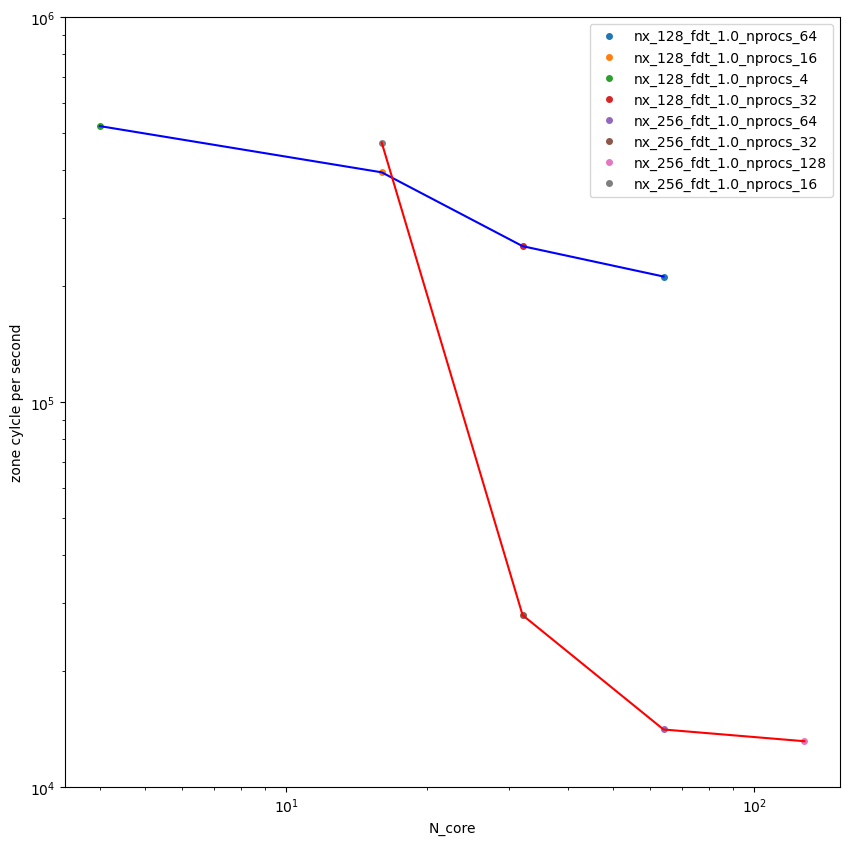

In [4]:
fig=plt.figure(figsize=(10,10))

core=np.array([])
zc=np.array([])
for m in range(len(Nx128)):
    f1=open(str(Nx128[m])+'/out.txt','r')
    lines=f1.readlines()
    a,b,c=lines[-3:]
    title=str(Nx128[m]).split('/')[-1]
    print(title+'\n',a,b,c)
    Ncore=float(title.split('_')[-1])
    value=float(c.split('=')[-1])/Ncore
    core=np.hstack([core,Ncore])
    zc=np.hstack([zc,value])
    plt.plot(Ncore,value,'o',ms=4,label=title)
    f1.close()
ind=np.array([2,1,3,0])
plt.plot(core[ind],zc[ind],'b')

core=np.array([])
zc=np.array([])
for m in range(len(Nx256)):
    f1=open(str(Nx256[m])+'/out.txt','r')
    lines=f1.readlines()
    a,b,c=lines[-3:]
    title=str(Nx256[m]).split('/')[-1]
    print(title+'\n',a,b,c)
    Ncore=float(title.split('_')[-1])
    value=float(c.split('=')[-1])/Ncore
    core=np.hstack([core,Ncore])
    zc=np.hstack([zc,value])
    plt.plot(Ncore,value,'o',ms=4,label=title)
    f1.close()
ind=np.array([3,1,0,2])
plt.plot(core[ind],zc[ind],'r')

plt.legend()
plt.xlabel('N_core')
plt.ylabel('zone cylcle per second')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e+4,1e+6)

### because the number of cells in one mesh block was fixed at $32^3$, the number of mesh blocks is $4^3$ about nx=128, and $8^3$ about nx=256

### the zone-cycle is almost independent on N_procs, unlike cpu-time.

### (zon-cycle/cpu-time/N_core) has the trend converging to specific value as N_core increases.

### in general, about the zone cycle per second, nx=128>nx=256, except for N_core=16. Why?

## 2. check the simulation with f_dt_rad=0.25

### because the simulation didn't end for f_dt_rad=0.25 and 0.30, I checked the case of f_dt_rad=0.35

In [7]:
path='/data/cjlee/hii/various_nH0_Qi'
datapath=Path(path)
pathlist=list(datapath.glob('*Q51.0n3.0*'))[:-1]
for i in range(len(pathlist)):
    print(i,pathlist[i])

0 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0
1 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_1.0
2 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_2.0
3 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_0.5
4 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_fdt_1.0
5 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.25
6 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.35
7 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.30


In [8]:
h_list=[]
for m in range(len(pathlist)):
    s=pa.LoadSim(str(pathlist[m]))
    h=pa.read_hst(s.files['hst'])
    h_list.append(h)

//home/cjlee/pyathena/pyathena/io/read_hst.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hst = pd.read_csv(filename, names=vlist,


Text(0, 0.5, 'dt')

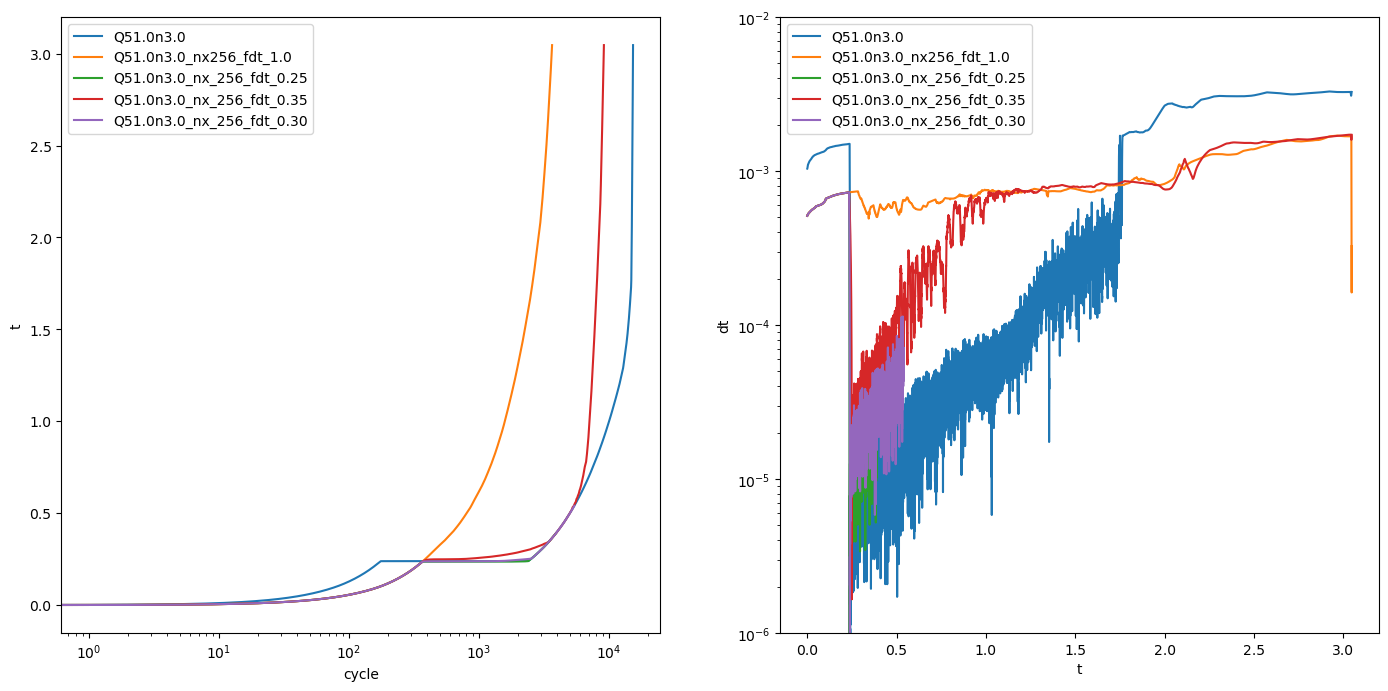

In [20]:
fig=plt.figure(figsize=(17,8))

fig=plt.subplot(1,2,1)
for k in [0,1,5,6,7]:
    h=h_list[k]
    plt.plot(range(len(h['time'])),h['time'],label=str(pathlist[k]).split('/')[-1][4:])

#plt.plot(range(len(h['time'])),h['time'],'o',label=str(pathlist[k]).split('/')[-1])
plt.legend()
plt.xscale('log')
plt.xscale('log')
plt.xlabel('cycle')
plt.ylabel('t')
#plt.ylim(1e-6,1e-2)

fig=plt.subplot(1,2,2)
for k in [0,1,5,6,7]:
    h=h_list[k]
    plt.plot(h['time'],h['dt'],label=str(pathlist[k]).split('/')[-1][4:])
plt.legend()
plt.yscale('log')
plt.ylim(1e-6,1e-2)
plt.xlabel('t')
plt.ylabel('dt')

### remember that the models with f_dt_rad=0.5,1.0,2.0 showed almost same reuslts.

### when trying f_dt_rad=0.25~0.35, they show simliar tendency with f_dt_rad=1.0 for t<t0_src. On the other hand, for t>t0_src(maybe, it was the effect of space resolution), they were close to the case of f_dt_rad=0.1(nx=128). 
### But, only the case of f_dt_rad=0.35 could end the simulation. And its time-step size graph became close to the models with f_dt_rad=1.0.

### I checked time evolution of ionized mass in domain(as shown before, time evolution of total mass is almost independent on resolution, so I didn't plot it). the below graph was zoomed in to check un-ended model(f_dt_rad=0.25,0.30), and I plot the result in the small box.
### the difference with the model with f_dt_rad=0.1 was smaller about the model with f_dt_rad=0.25~0.35

### Although the result became more accurate as f_dt_rad -> 0.1, but the  proper limit for simulation time was almost f_dt_rad=0.35

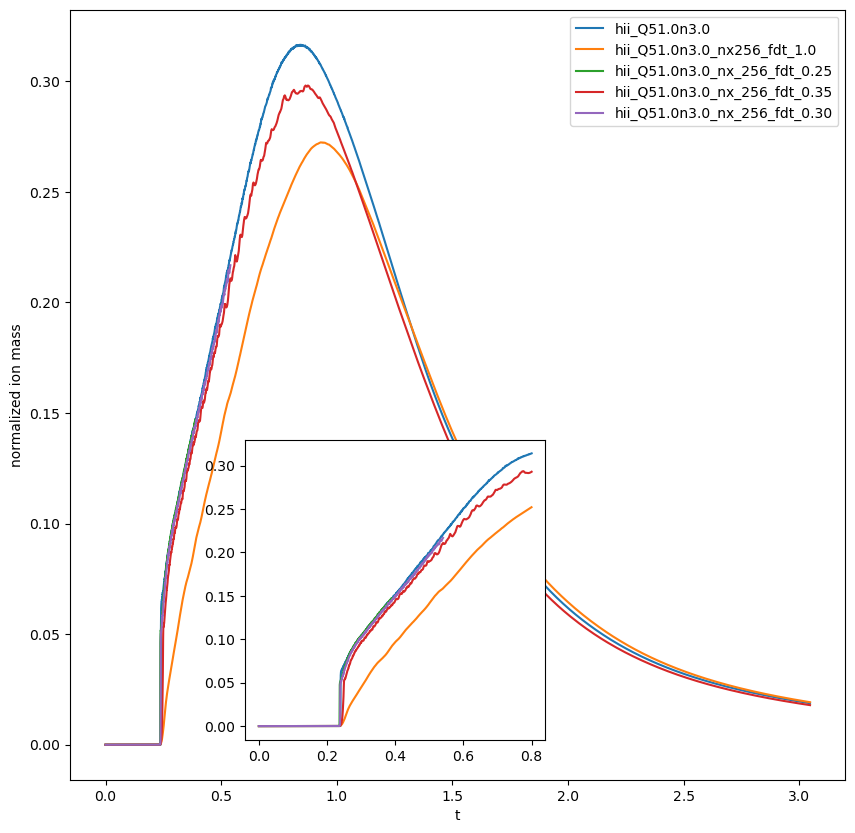

In [24]:
fig=plt.figure(figsize=(10,10))
rect = (0.3, 0.15, 0.3, 0.3)

for k in [0,1,5,6,7]:
    h=h_list[k]
    plt.plot(h['time'],(h['mass']-h['0scalar'])/h['mass'][0],label=str(pathlist[k]).split('/')[-1])
#plt.xscale('log')
#plt.xlim(0,0.5)
plt.xlabel('t')
plt.ylabel('normalized ion mass')
plt.legend()
new_ax = fig.add_axes(rect)
for k in [0,1,5,6,7]:
    h=h_list[k]
    new_ax.plot(h['time'][h['time']<0.8],(h['mass']-h['0scalar'])[h['time']<0.8]/h['mass'][0])

### the below graph shows time evolution of all types of mass(ion/neu/tot, ejecta/in domain) about models of f_dt_rad=0.1,0.35,1.0

### about the mass in domain, the result became closer to with f_dt_rad_0.1, but about ejecta mass, the difference between f_dt_rad=0.1 and f_dt_rad=0.35 was 5%~10% of initial mass.
### considering the results of Kim2018 Appedix A, that difference caused by f_dt_rad must not be neglected.

/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0
/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_1.0
/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.35


Text(0, 0.5, '$M/M_0$')

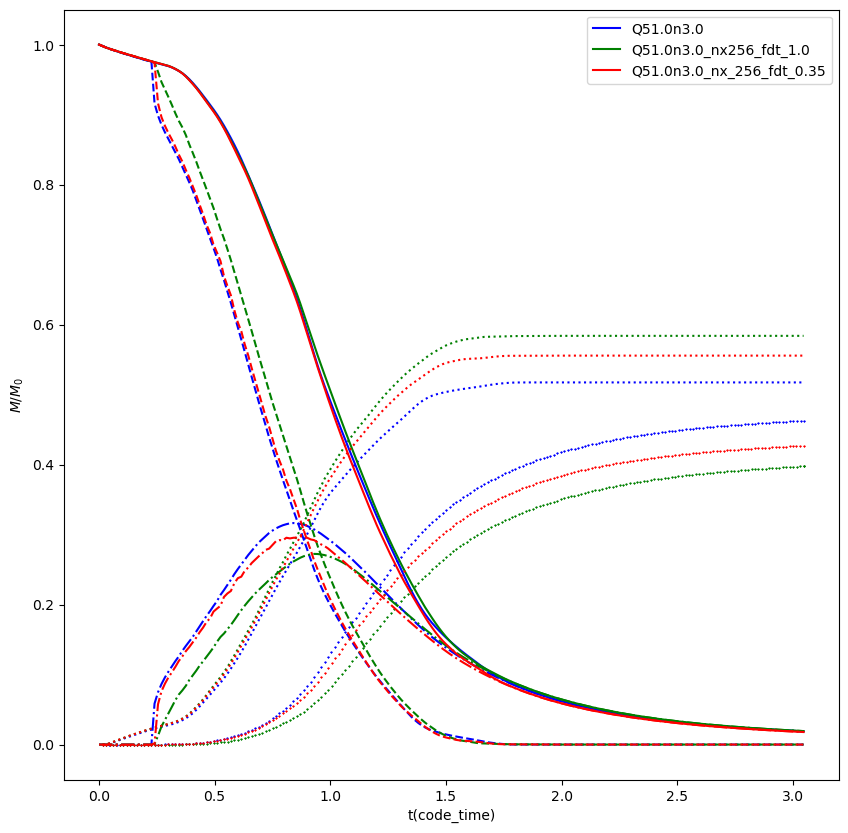

In [26]:
region='total'
def integrate(t,val):
    dt=t[1:]-t[:-1]
    dval=dt*val[:-1]
    result=[np.sum(dval[:k]) for k in range(len(dval))]
    return t[1:], np.array(result)
fig=plt.figure(figsize=(10,10))
mark_list=['b','g','y','g','r','r','r']
for i in [0,1,6]:
    path=str(pathlist[i])
    print(path)
    s = pa.LoadSim(str(pathlist[i]))
    h = pa.read_hst(s.files['hst'])
    t1=QTable.read(path+'/hst_in_domain',format='latex')
    t2=QTable.read(path+'/outflow_hst',format='latex')

    M0=h['mass'][0]
    t=t1['time_'+region]

    t_,ej_neu=integrate(t2['time_'+region],t2['Mass_neu_'+region])
    ej_ion=integrate(t2['time_'+region],t2['Mass_ion_'+region])[1]
    M_tot=t1['Mass_tot_'+region]
    M_neu=t1['Mass_neu_'+region]
    M_ion=t1['Mass_ion_'+region]

    plt.plot(t,(M_tot/M0),mark_list[i]+'-',ms=3,label=str(pathlist[i]).split('/')[-1][4:])
    plt.plot(t,(M_neu/M0),mark_list[i]+'--',ms=3)
    plt.plot(t,(M_ion/M0),mark_list[i]+'-.',ms=3)
    plt.plot(t_,(ej_neu/M0),mark_list[i]+':',ms=3)
    plt.plot(t_,(ej_ion/M0),mark_list[i]+'*',ms=1)

plt.legend()
plt.xlabel('t(code_time)')
plt.ylabel('$M/M_0$')
#plt.title(path.split('/')[-1])

## 3. Mass evaporation rate

In [29]:
def get_data(s, num):
    # num = s.nums[100]
    d = s.load_hdf5(num)
    add_fields(d,s)
    dd=d.all_data()
    u = s.u
    dvol = s.domain['dx'].prod()
    # Derived fields
    dd['radius'] = np.sqrt(dd['x']**2 + dd['y']**2 + dd['z']**2)
    # dd['rho_neu'] = dd['rho']*dd['r0']
    # dd['rho_ion'] = dd['rho']*(1 - dd['r0'])
    
    # Sort cells in ascending order
    idx_ion = dd['r0'] < 0.5
    idx = np.argsort(dd['radius'].flatten())
    
    rr = dict()
    rr['r'] = dd['radius'].flatten()[idx]
    rr['Mion_r'] = (dd['rho'].value*idx_ion).flatten()[idx].cumsum()*dvol*u.mass
    rr['Mneu_r'] = (dd['rho'].value*~idx_ion).flatten()[idx].cumsum()*dvol*u.mass
    rr['Pion_r'] = (dd['rad_pressure_grad'].value*idx_ion).flatten()[idx].cumsum()*dvol
    rr['Pneu_r'] = (dd['rad_pressure_grad'].value*~idx_ion).flatten()[idx].cumsum()*dvol
    
    rr['fV_neu'] = idx_ion.sum()/dd['r0'].size
    rr['fV_ion'] = 1.0 - rr['fV_neu']
    rr['dot_rho_ev'] = -dd['rho_hi_dot'].value.flatten()[idx]
    rr['dot_M_ev'] = rr['dot_rho_ev'].cumsum()*dvol*u.mass/u.time
    rr['time'] = d.current_time.value
    
    return dd, rr
def find_r(x,y,per):
    cut=np.max(y)*per
    region=np.where(y>=cut)
    return np.min(x[region])

In [38]:
m=0
p=hii(pathlist[m],0)
s=p.data_set
ds=p.snap  
add_fields(ds,s)
ad=ds.all_data()
grid=p.grid

yt : [WARNING  ] 2024-04-11 16:39:39,029 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 16:39:39,030 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 16:39:39,031 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 16:39:39,032 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 16:39:39,033 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 16:39:39,087 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-11 16:39:39,088 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 16:39:39,089 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 16:39:39,089 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 16:39:39,090 Parameters: cosmological_simulation   = 0


In [51]:

r_evap={'time':np.array([]),'radius':np.array([])}
r_neu={'time':np.array([]),'radius':np.array([])}
r_ion={'time':np.array([]),'radius':np.array([])}

tlim = s.par['time']['tlim']
dict_list=[]

for num in s.nums[10:100:1]:
    if num%10==0:
        print(num)
    dd, rr = get_data(s, num)
    dict_list.append(rr)
    
    r_evap['time']=np.hstack([r_evap['time'],rr['time']])
    r_evap['radius']=np.hstack([r_evap['radius'],find_r(rr['r'],rr['dot_M_ev'],0.95)])
    
    r_neu['time']=np.hstack([r_neu['time'],rr['time']])
    r_neu['radius']=np.hstack([r_neu['radius'],find_r(rr['r'],rr['Mneu_r'],0.95)])
    r_ion['time']=np.hstack([r_ion['time'],rr['time']])
    r_ion['radius']=np.hstack([r_ion['radius'],find_r(rr['r'],rr['Mion_r'],0.95)])


10


yt : [WARNING  ] 2024-04-11 17:00:31,585 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:00:31,586 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:00:31,587 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:00:31,588 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:00:31,589 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:00:31,650 Parameters: current_time              = 0.15126678
yt : [INFO     ] 2024-04-11 17:00:31,651 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:00:31,652 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:00:31,653 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:00:31,654 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 

20


yt : [WARNING  ] 2024-04-11 17:01:49,415 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:01:49,418 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:01:49,418 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:01:49,419 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:01:49,420 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:01:49,451 Parameters: current_time              = 0.31500763
yt : [INFO     ] 2024-04-11 17:01:49,452 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:01:49,452 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:01:49,453 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:01:49,454 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 

30


yt : [WARNING  ] 2024-04-11 17:02:46,029 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:02:46,030 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:02:46,031 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:02:46,032 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:02:46,033 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:02:46,063 Parameters: current_time              = 0.46500516
yt : [INFO     ] 2024-04-11 17:02:46,064 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:02:46,065 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:02:46,066 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:02:46,066 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 

40


yt : [WARNING  ] 2024-04-11 17:03:41,886 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:03:41,888 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:03:41,889 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:03:41,890 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:03:41,891 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:03:41,926 Parameters: current_time              = 0.6150262
yt : [INFO     ] 2024-04-11 17:03:41,926 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:03:41,927 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:03:41,928 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:03:41,929 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

50


yt : [WARNING  ] 2024-04-11 17:04:39,007 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:04:39,009 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:04:39,010 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:04:39,010 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:04:39,011 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:04:39,041 Parameters: current_time              = 0.7650257
yt : [INFO     ] 2024-04-11 17:04:39,042 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:04:39,043 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:04:39,044 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:04:39,045 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

60


yt : [WARNING  ] 2024-04-11 17:05:36,281 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:05:36,282 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:05:36,283 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:05:36,284 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:05:36,284 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:05:36,315 Parameters: current_time              = 0.9150361
yt : [INFO     ] 2024-04-11 17:05:36,316 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:05:36,317 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:05:36,318 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:05:36,319 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

70


yt : [WARNING  ] 2024-04-11 17:06:35,013 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:06:35,015 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:06:35,016 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:06:35,017 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:06:35,018 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:06:35,051 Parameters: current_time              = 1.0650027
yt : [INFO     ] 2024-04-11 17:06:35,052 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:06:35,052 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:06:35,053 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:06:35,054 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

80


yt : [WARNING  ] 2024-04-11 17:07:34,782 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:07:34,783 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:07:34,784 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:07:34,784 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:07:34,785 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:07:34,812 Parameters: current_time              = 1.2150308
yt : [INFO     ] 2024-04-11 17:07:34,813 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:07:34,813 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:07:34,814 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:07:34,815 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

90


yt : [WARNING  ] 2024-04-11 17:08:32,204 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-11 17:08:32,206 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-11 17:08:32,207 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-11 17:08:32,208 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-11 17:08:32,209 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-11 17:08:32,242 Parameters: current_time              = 1.3650961
yt : [INFO     ] 2024-04-11 17:08:32,242 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-11 17:08:32,243 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-11 17:08:32,244 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-11 17:08:32,245 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

Text(0.5, 0.98, 'Model: hii_Q51.0n3.0')

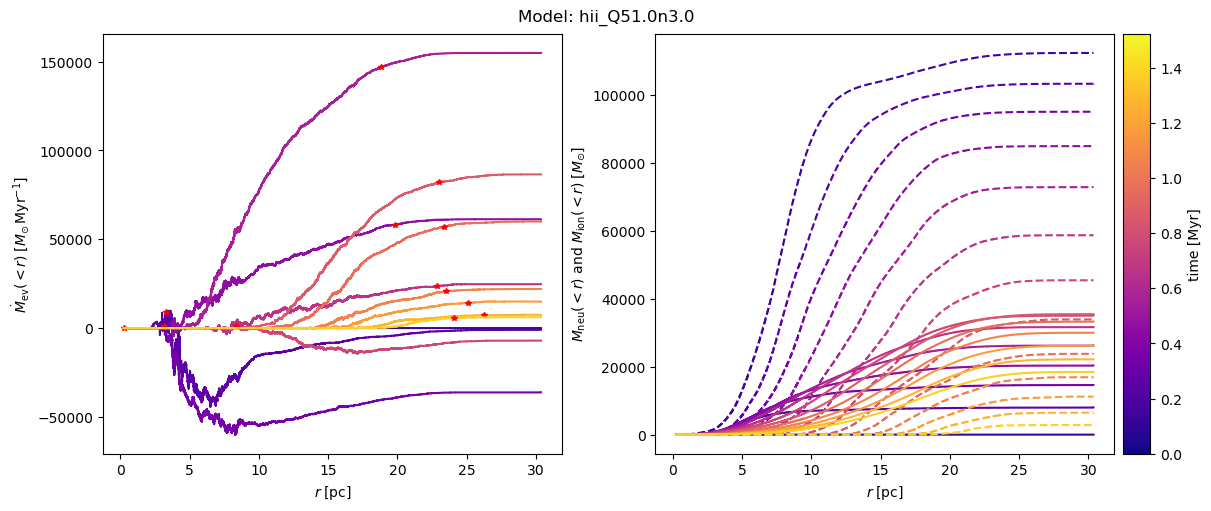

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), constrained_layout=True,
                         gridspec_kw=dict(width_ratios=[0.5,0.5,0.03]))

tlim = s.par['time']['tlim']
norm = plt.Normalize(0, 0.5*tlim)
cmap = mpl.cm.plasma

for num in range(0,len(dict_list),7):

    rr=dict_list[num]
    plt.sca(axes[0])
    plt.plot(rr['r'], rr['dot_M_ev'], c=cmap(norm(rr['time']*s.u.Myr)))
    plt.plot(r_evap['radius'][num], 0.95*np.max(rr['dot_M_ev']),'r*',ms=4)

    plt.sca(axes[1])
    l, = plt.plot(rr['r'], rr['Mion_r'], c=cmap(norm(rr['time']*s.u.Myr)))
    plt.plot(rr['r'], rr['Mneu_r'], c=l.get_color(), ls='--')
    # break
    
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
plt.colorbar(sm, cax=axes[-1], label='time [Myr]')
plt.setp(axes[0], ylabel=r'$\dot{M}_{\rm ev}(<r)\;[M_{\odot}\,{\rm Myr}^{-1}]$')
plt.setp(axes[1], ylabel=r'$M_{\rm neu}(<r)$ and $M_{\rm ion}(<r)\;[M_{\odot}]$')
plt.setp(axes[0:2], xlabel=r'$r\;[{\rm pc}]$')
plt.suptitle('Model: ' + s.basename)

### the above graph is volume-integrated value of $\dot{\rho}_{hi}$(left) and ion/neutral mass density about the sphere with r, and time range is 0.15~1.5 code_time.

### at $t<<t_{lim},$ there were some regions near the center where recombination dominated. but, as time goes, global ionization rate was higher than recombination rate, and finally converges to 0.

### as shown at the both graph, the characteristic radius where the graph began to be flattened propagated radially out. the time evolution of $r_{0.95\times max}$ about evaporation rate, ion/neutral mass.

### execpt for the fluctuation in $R_{evap}$ caused by the recombination-dominated stage, $R-{neu}$ and $R_{evap}$ are similar.

Text(0, 0.5, 'radius(code_length)')

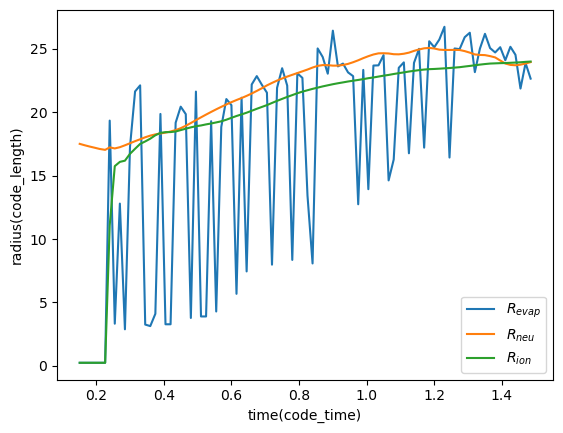

In [55]:
plt.plot(r_evap['time'],r_evap['radius'],label='$R_{evap}$')
plt.plot(r_neu['time'],r_neu['radius'],label='$R_{neu}$')
plt.plot(r_ion['time'],r_ion['radius'],label='$R_{ion}$')
plt.legend()
plt.xlabel('time(code_time)')
plt.ylabel('radius(code_length)')

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_82818/3898664053.py:9: SyntaxWarning: invalid escape sequence '\d'
  axes[0].set_ylabel('$\dot{M}_{evap}/\dot{M}_{evap,tot}$')


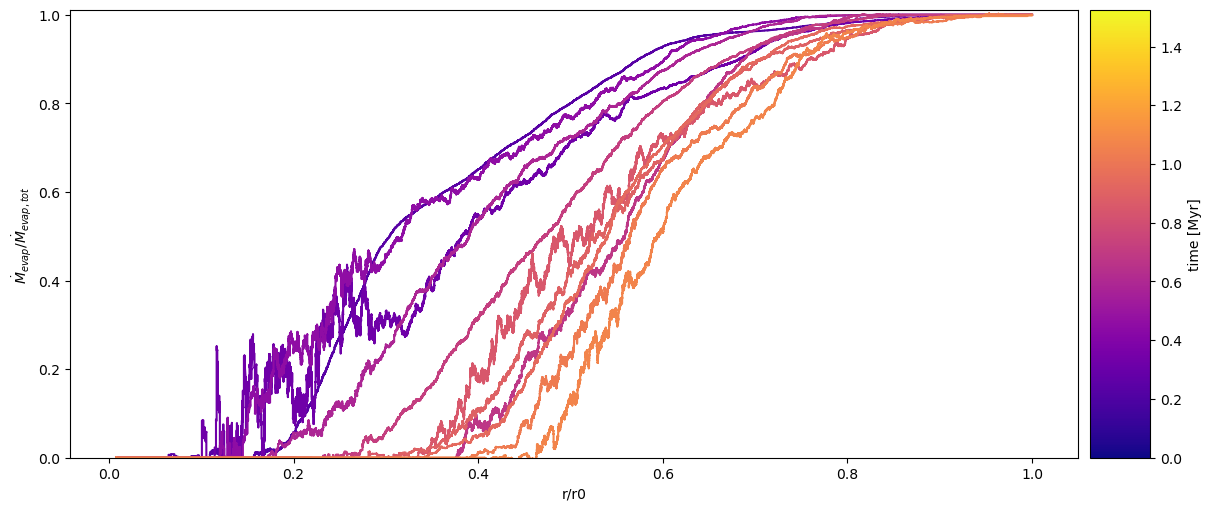

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True,
                         gridspec_kw=dict(width_ratios=[0.5,0.03]))
for i in range(0,len(dict_list),3):
    dd=dict_list[i]
    if dd['dot_M_ev'][-1].value>20000:
        axes[0].plot(dd['r']/dd['r'][-1],dd['dot_M_ev']/dd['dot_M_ev'][-1],label=str(dd['time']),c=cmap(norm(dd['time']*s.u.Myr)))

axes[0].set_xlabel('r/r0')
axes[0].set_ylabel('$\dot{M}_{evap}/\dot{M}_{evap,tot}$')
#plt.legend()
axes[0].set_ylim(0,1.01)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, cax=axes[-1], label='time [Myr]')

### the above graph is about evaporation rate normalized by the total evaporation rate. because the negative or small positive total evaporation rate caused fluctuated results, I set the limit for plotting.

### one can use profile in the below graph to represent the radial profile analytically. it seems proper about some profiles at certain times, but there were some fluctuation which couldn't be plotted by that profile.

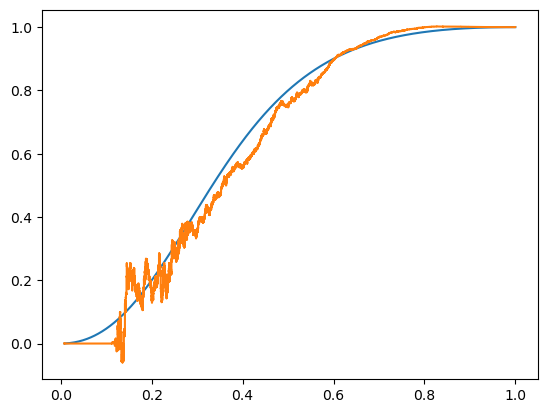

In [85]:
dd=dict_list[20]
a=0.5
def profile(x):
    global a
    return 1/(1+a**2*(1/x-1)**2)
plt.plot(dd['r']/dd['r'][-1],profile(dd['r']/dd['r'][-1]))
plt.plot(dd['r']/dd['r'][-1],dd['dot_M_ev']/dd['dot_M_ev'][-1],label=str(dd['time']))

## time evolution of total evaporation mass rate

### in this section, I compared the time evolution of evaporation rate with the result calculated by the next formula. 
### $\partial M_{ion}/\partial t + \dot{M}_{ej,ion} = \dot{M}_{evap}$

### the below two graphs show the result for the case f_dt_rad=0.1 & nx=128 and f_dt_rad=1.0 & nx=256.
### in each graph, time-integrated value is also plotted in small box.

### Strangely, the result was very accurate in the model with f_dt_rad=1.0 not 0.1. And time-integrated values were almost same.

## did the model with f_dt_rad=1.0 really solve the ionizaion equation more accurately?

<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_82818/3045432297.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{M}_{evap}$')
/tmp/ipykernel_82818/3045432297.py:41: SyntaxWarning: invalid escape sequence '\D'
  new_ax.plot(t[:-1],M_in[:-1],label='$\Delta M$')
/tmp/ipykernel_82818/3045432297.py:43: SyntaxWarning: invalid escape sequence '\D'
  new_ax.plot(t[:-1],ej+M_in[:-1],label='total=$\Delta M$+outflow')


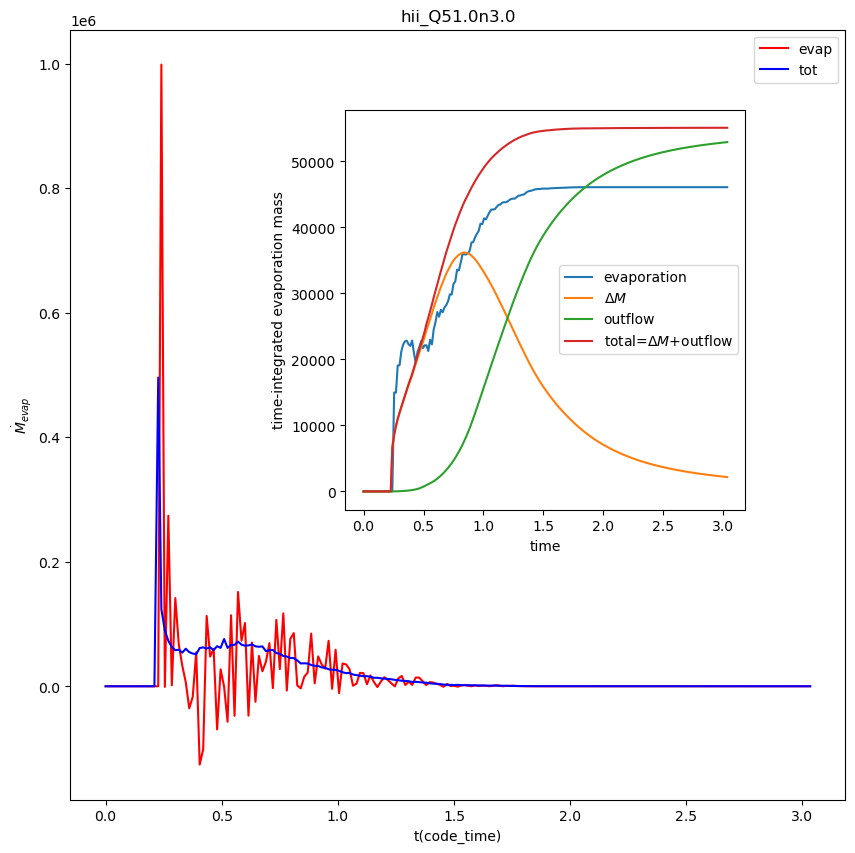

In [105]:
region='total'
i=0
path=str(pathlist[i])
s = pa.LoadSim(str(pathlist[i]))

t1=QTable.read(path+'/hst_in_domain',format='latex')
t2=QTable.read(path+'/outflow_hst',format='latex')
t=t1['time_'+region]

ej_ion=t2['Mass_ion_'+region]
N_ej=ej_ion*s.u.mass
N_in=t1['Mass_ion_'+region]*s.u.mass
N_dot=(N_in[1:]-N_in[:-1])/(t[1:]-t[:-1])

fig=plt.figure(figsize=(10,10))

plt.plot(t[:-1],-t1['Mion_evap_total'][:-1]*s.u.mass,'r',label='evap')
plt.plot(t[:-1],N_dot+N_ej[:-1],'b',label='tot')

plt.legend()
plt.xlabel('t(code_time)')
plt.ylabel('$\dot{M}_{evap}$')
plt.title(path.split('/')[-1])
dt=t[1:]-t[:-1]
ej_ion=t2['Mass_ion_'+region]
M_ej=ej_ion*s.u.mass
M_in=t1['Mass_ion_'+region]*s.u.mass.value
M_dot_evap=t1['Mion_evap_total']*s.u.mass

rect = (0.40, 0.40, 0.4, 0.4)
new_ax = fig.add_axes(rect)

M_evap=np.array([np.sum(-M_dot_evap[:k]*dt[:k]).value for k in range(len(dt))])
dM_in=(M_in[-2]-M_in[0])
ej=np.array([np.sum(M_ej[:k]*dt[:k]).value for k in range(len(dt))])

#fig=plt.figure(figsize=(10,10))


new_ax.plot(t[:-1],M_evap,label='evaporation')
new_ax.plot(t[:-1],M_in[:-1],label='$\Delta M$')
new_ax.plot(t[:-1],ej,label='outflow')
new_ax.plot(t[:-1],ej+M_in[:-1],label='total=$\Delta M$+outflow')
new_ax.set_xlabel('time')
new_ax.set_ylabel('time-integrated evaporation mass')
plt.legend()

/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_0.5


<>:50: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\D'
<>:50: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_82818/1589890321.py:50: SyntaxWarning: invalid escape sequence '\D'
  new_ax.plot(t[:-1],M_in[:-1],label='$\Delta M$')
/tmp/ipykernel_82818/1589890321.py:52: SyntaxWarning: invalid escape sequence '\D'
  new_ax.plot(t[:-1],ej+M_in[:-1],label='total=$\Delta M$+outflow')


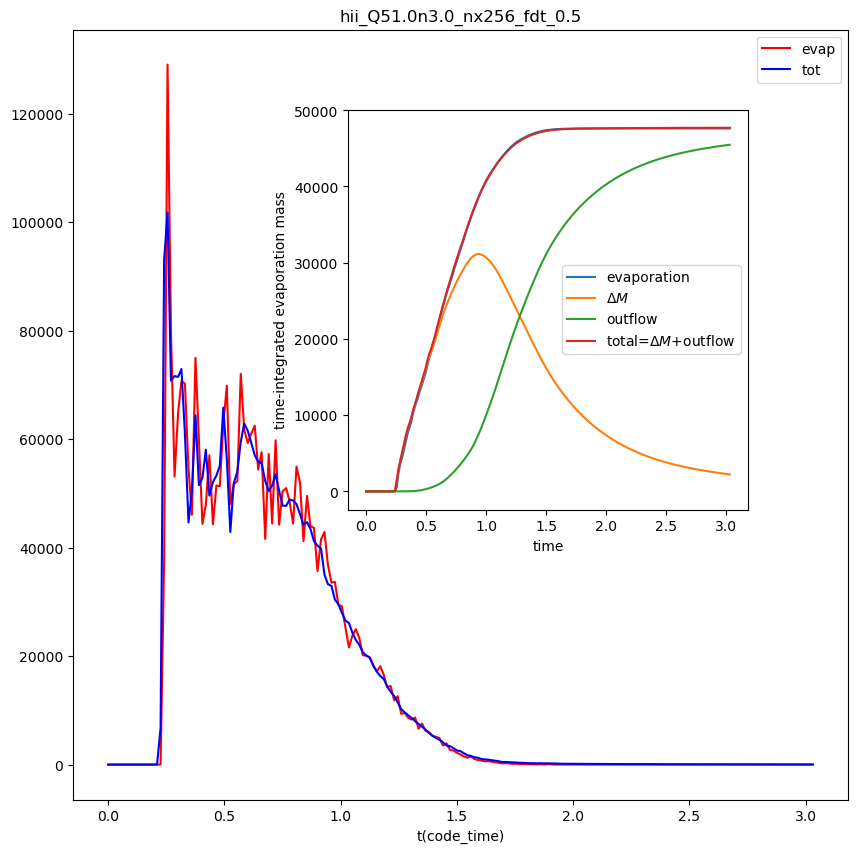

In [106]:
region='total'
i=3
path=str(pathlist[i])
print(path)
s = pa.LoadSim(str(pathlist[i]))
h = pa.read_hst(s.files['hst'])
t1=QTable.read(path+'/hst_in_domain',format='latex')
t2=QTable.read(path+'/outflow_hst',format='latex')
muH=s.par['units']['mean_mass_per_hydrogen']
t=t1['time_'+region]

ej_ion=t2['Mass_ion_'+region]
N_ej=ej_ion*s.u.mass
N_in=t1['Mass_ion_'+region]*s.u.mass
N_dot=(N_in[1:]-N_in[:-1])/(t[1:]-t[:-1])


fig=plt.figure(figsize=(10,10))


#plt.plot(np.array([dd['time'] for dd in dict_list]),np.array([np.max(dd['dot_M_ev']).value for dd in dict_list]),'g',label='max($M_{dot,evap}$)')
#for dd in dict_list:
    #plt.plot(dd['time'],np.max(dd['dot_M_ev']),'ro',ms=3)
#plt.plot(t,N_ej,label='M_ej')
#plt.plot(t[:-1],N_dot,label='dM/dt')
plt.plot(t[:-1],-t1['Mion_evap_total'][:-1]*s.u.mass,'r',label='evap')
plt.plot(t[:-1],N_dot+N_ej[:-1],'b',label='tot')

plt.legend()
plt.xlabel('t(code_time)')
#plt.ylabel('')
plt.title(path.split('/')[-1])
dt=t[1:]-t[:-1]
ej_ion=t2['Mass_ion_'+region]
M_ej=ej_ion*s.u.mass
M_in=t1['Mass_ion_'+region]*s.u.mass.value
M_dot_evap=t1['Mion_evap_total']*s.u.mass

rect = (0.40, 0.40, 0.4, 0.4)
new_ax = fig.add_axes(rect)

M_evap=np.array([np.sum(-M_dot_evap[:k]*dt[:k]).value for k in range(len(dt))])
dM_in=(M_in[-2]-M_in[0])
ej=np.array([np.sum(M_ej[:k]*dt[:k]).value for k in range(len(dt))])

#fig=plt.figure(figsize=(10,10))


new_ax.plot(t[:-1],M_evap,label='evaporation')
new_ax.plot(t[:-1],M_in[:-1],label='$\Delta M$')
new_ax.plot(t[:-1],ej,label='outflow')
new_ax.plot(t[:-1],ej+M_in[:-1],label='total=$\Delta M$+outflow')
new_ax.set_xlabel('time')
new_ax.set_ylabel('time-integrated evaporation mass')
plt.legend()

## 4. get the radial force by integrating the radial profile of radial pressure gradient.

Text(0.5, 1.0, 'Model: hii_Q51.0n3.0_nx256_fdt_0.5')

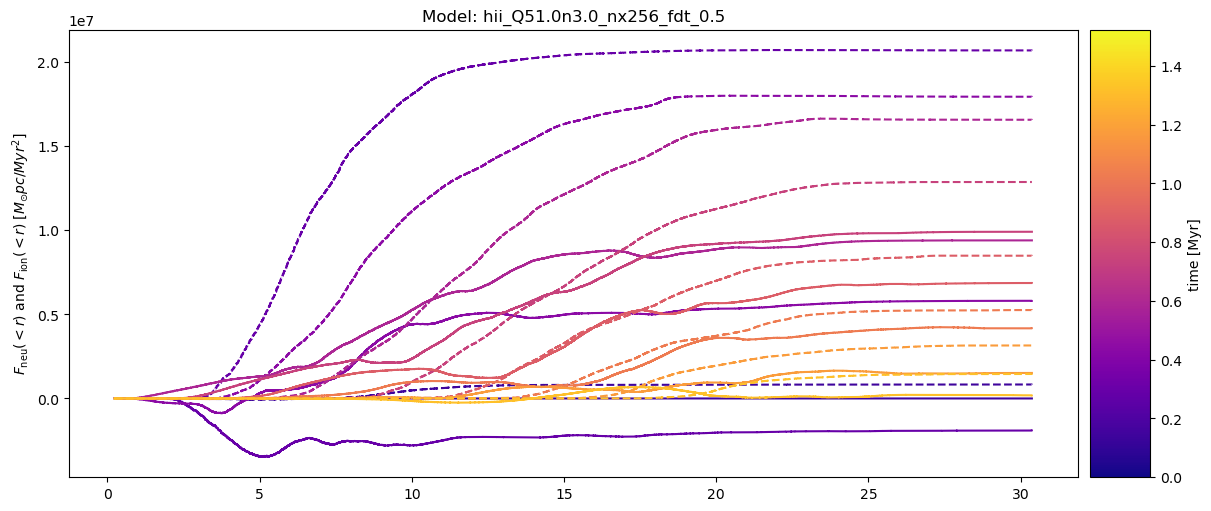

In [108]:
fig,axes= plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True,
                         gridspec_kw=dict(width_ratios=[0.5,0.03]))

tlim = s.par['time']['tlim']
norm = plt.Normalize(0, 0.5*tlim)
cmap = mpl.cm.plasma
for num in range(0,len(dict_list),10):
    rr=dict_list[num]
    axes[0].plot(rr['r'], -rr['Pion_r']*(s.u.length/s.u.time**2).value, c=cmap(norm(rr['time']*s.u.Myr)))
    axes[0].plot(rr['r'], -rr['Pneu_r']*(s.u.length/s.u.time**2).value, c=cmap(norm(rr['time']*s.u.Myr)), ls='--')
    # break

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
plt.colorbar(sm, cax=axes[-1], label='time [Myr]')

axes[0].set_ylabel(r'$F_{\rm neu}(<r)$ and $F_{\rm ion}(<r)\;[M_{\odot} pc /Myr^2]$')
axes[1].set_label('code_time')
axes[0].set_title('Model: ' + s.basename)

### 1) At the beginning of simulation, initial density gradient exerts radial force to neutral gas.### 2) About neutral gas, the radial force always exerts radially outward.  About ionized gas, the radial force radially inward at t~t0_src, but it became simila   with the case of neutral gas as time goes by.

